In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = np.load("../../Data/development.npy")
data_csv = pd.read_csv("../../Data/metadata/development.csv")
idx_to_feature_name = pd.read_csv("../../Data/metadata/idx_to_feature_name.csv")

In [8]:
data_csv['word']

0           Brötchen
1               kann
2        Staubsauger
3            Spiegel
4              Alarm
            ...     
45291          other
45292          other
45293          other
45294          other
45295          other
Name: word, Length: 45296, dtype: object

In [10]:
words = np.unique(data_csv['word']).tolist()
ids_of_interest = dict()
data_of_interest = dict()

In [56]:
for word in words:
    ids_of_interest[word] = data_csv[data_csv['word'] == word]['id']
for word in words:
    some_list = []
    ids = ids_of_interest[word].tolist()
    for i in ids:
        some_list.append(data[i])
    data_of_interest[word] = some_list


In [63]:
for word in words:
    mean_value = np.mean(data_of_interest[word])
    outliers = []
    samples_in_total = 0
    for sample, i in zip(data_of_interest[word], ids_of_interest[word].tolist()):
        if np.mean(sample) > 2 * mean_value:
            outliers.append(i)
        samples_in_total += 1
    print(f"Mean Value of {word}: {mean_value}")
    print(f"Outliers / Samples: {len(outliers)} / {samples_in_total}")
    print(f"Outlier ids: {outliers}")
    print(50*'_')

Mean Value of Alarm: 29.300368986567012
Outliers / Samples: 4 / 2042
Outlier ids: [8353, 13042, 21052, 21592]
__________________________________________________
Mean Value of Brötchen: 32.21101783119608
Outliers / Samples: 4 / 2038
Outlier ids: [21045, 21088, 28327, 35411]
__________________________________________________
Mean Value of Fernseher: 34.18478469917554
Outliers / Samples: 0 / 2046
Outlier ids: []
__________________________________________________
Mean Value of Haus: 42.41163509327561
Outliers / Samples: 0 / 2042
Outlier ids: []
__________________________________________________
Mean Value of Heizung: 34.890226011708826
Outliers / Samples: 1 / 2036
Outlier ids: [20330]
__________________________________________________
Mean Value of Leitung: 29.79638519822006
Outliers / Samples: 15 / 2045
Outlier ids: [8323, 8332, 8358, 8361, 13047, 21534, 21562, 21572, 21594, 28314, 28324, 28326, 28350, 28990, 34383]
__________________________________________________
Mean Value of Licht: 4

In [37]:
data

array([[[3.21528840e+03, 3.39032799e+03, 3.45865419e+03, ...,
         3.31051667e+03, 3.46176593e+03, 3.70965023e+03],
        [3.16357823e+03, 3.14004611e+03, 3.09404894e+03, ...,
         3.00910576e+03, 3.06438316e+03, 3.17784890e+03],
        [3.42933256e+00, 1.37313543e+00, 2.35436370e+00, ...,
         1.10037211e+01, 1.00871744e+01, 1.99156706e+00],
        ...,
        [1.19294114e-02, 3.39671061e-03, 2.29437789e-03, ...,
         3.35852313e-03, 2.75160722e-03, 2.21575401e-03],
        [1.25766811e+02, 1.21098354e+02, 1.03804931e+02, ...,
         4.22392025e+03, 1.01767473e+02, 1.04462485e+02],
        [3.50000000e-01, 3.15000000e-01, 3.07500000e-01, ...,
         3.22500000e-01, 2.82500000e-01, 3.22500000e-01]],

       [[3.38272385e+03, 3.28434619e+03, 3.30678888e+03, ...,
         3.31343991e+03, 3.32815753e+03, 3.31811862e+03],
        [2.19597339e+03, 1.99899751e+03, 2.25873867e+03, ...,
         2.07308896e+03, 2.09135685e+03, 2.06991190e+03],
        [2.39606292e+00, 

In [ ]:
pca = PCA(n_components=10)
pca_res = pca.fit_transform(ids_of_interest['Brötchen'])
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].scatter(pca_res)
axs[0].set_title('PCA')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

/var/folders/3y/1_bbjcnj5ms402f0w0q93dmc0000gn/T/ipykernel_25781/2110163468.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


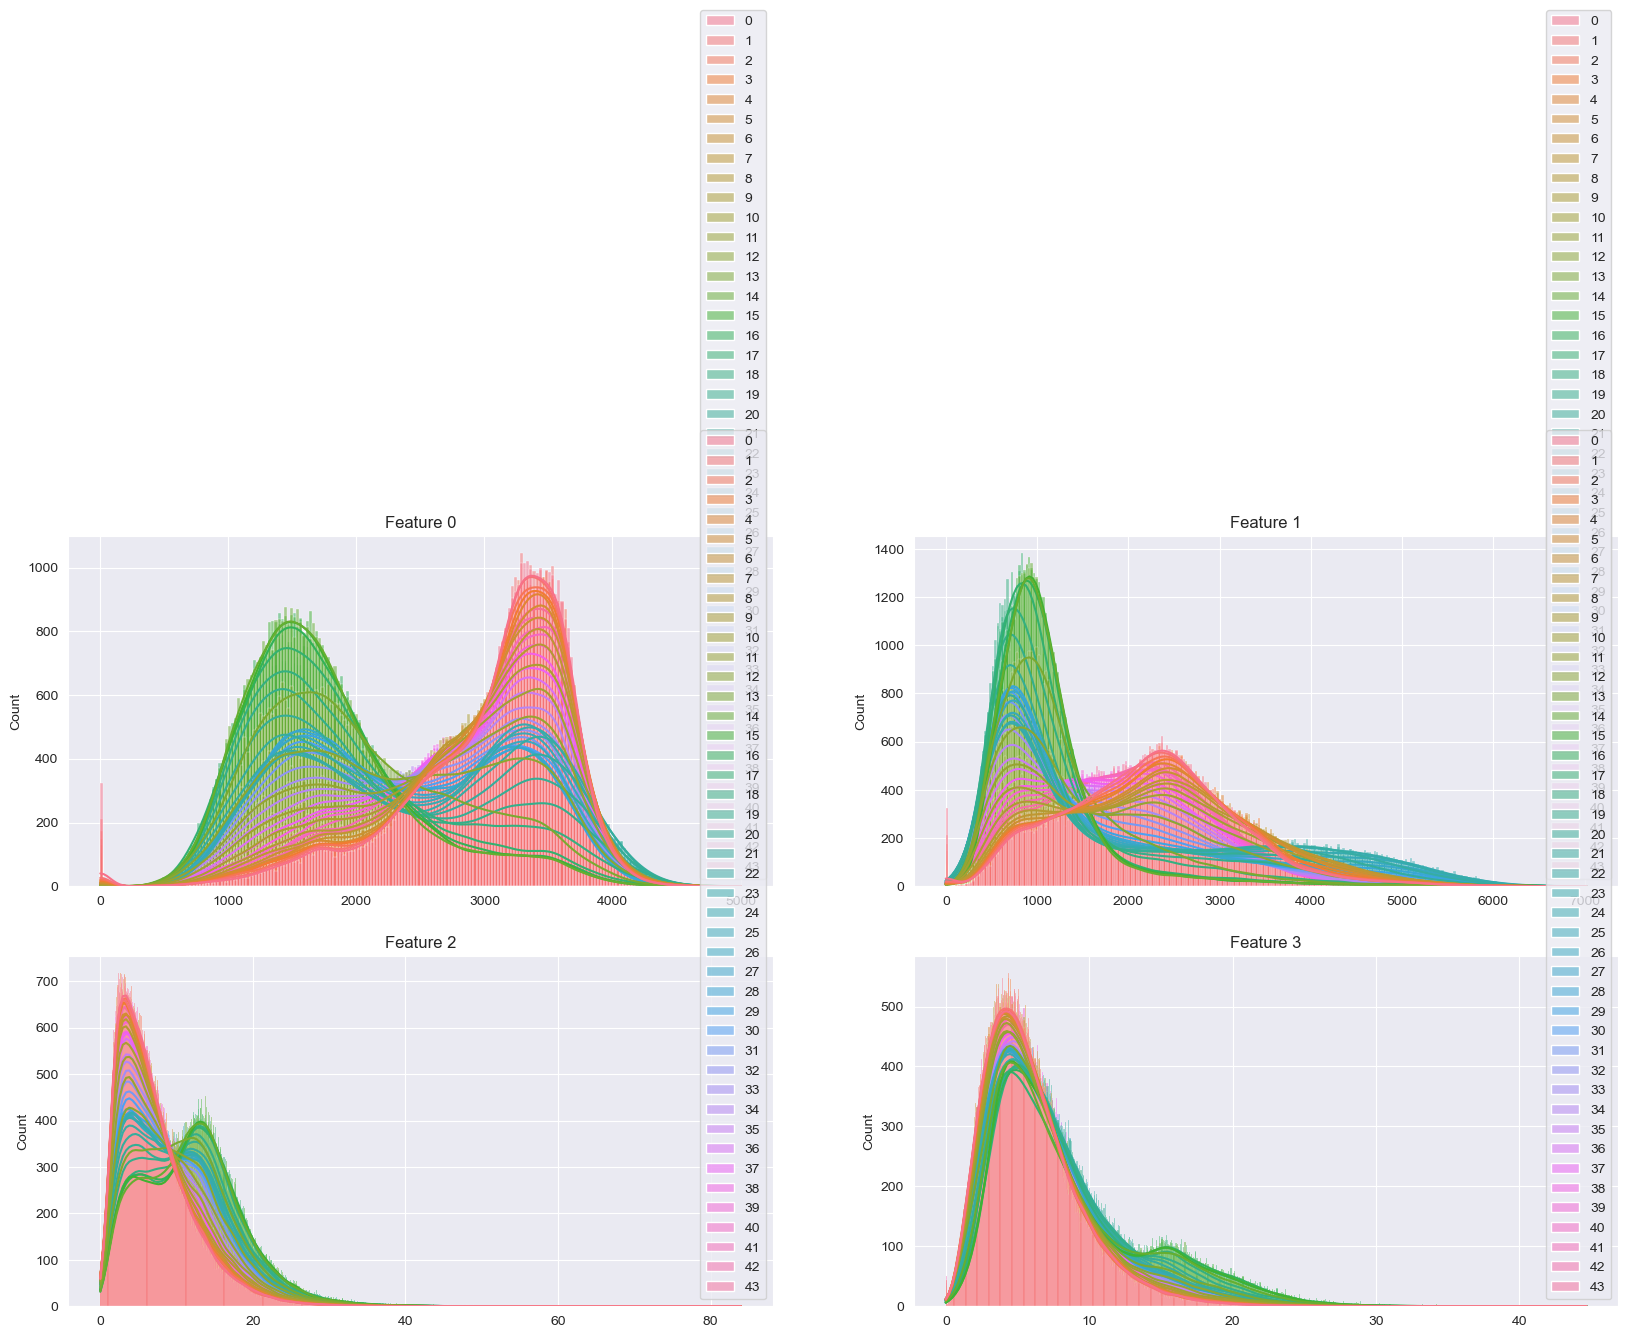

AttributeError: Figure.set() got an unexpected keyword argument 'legend'

In [4]:
plt.figure(figsize=(20, 10))
for i in range(4):  # Adjust to plot more features
    plt.subplot(2, 2, i+1)
    sns.histplot(data[:, i], kde=True)
    plt.title(f'Feature {i}')
plt.tight_layout()
plt.show()

# Box plot for the first few features
plt.figure(figsize=(10, 6), legend=False)
sns.boxplot(data=data[:, :4])  # Adjust to include more features
plt.title('Box plot of the first few features')
plt.tight_layout()
plt.show()

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Performing PCA
pca = PCA(n_components=3)  # Reduce to 2 components for plotting
pca_result = pca.fit_transform(data[:-1])

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Scatter Plot')
plt.show()


ValueError: Found array with dim 3. PCA expected <= 2.